In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
df = pd.read_csv ("data-table.csv")
df

,Laikotarpis,Rodiklis,Amžius (tikslinės amžiaus grupės),Gyvenamoji vietovė,Lytis,Matavimo vienetai,Reikšmė
0,2020K3,Nedarbo lygis,Iš viso pagal amžiaus grupes,Miestas ir kaimas,Vyrai ir moterys,proc.,9.3
1,2020K4,Nedarbo lygis,Iš viso pagal amžiaus grupes,Miestas ir kaimas,Vyrai ir moterys,proc.,9.0
2,2021K1,Nedarbo lygis,Iš viso pagal amžiaus grupes,Miestas ir kaimas,Vyrai ir moterys,proc.,7.5
3,2021K2,Nedarbo lygis,Iš viso pagal amžiaus grupes,Miestas ir kaimas,Vyrai ir moterys,proc.,7.4
4,2021K3,Nedarbo lygis,Iš viso pagal amžiaus grupes,Miestas ir kaimas,Vyrai ir moterys,proc.,6.7
...,...,...,...,...,...,...,...
643,2021K2,Nedarbo lygis,65+,Kaimas,Moterys,proc.,NaN
644,2021K3,Nedarbo lygis,65+,Kaimas,Moterys,proc.,NaN
645,2021K4,Nedarbo lygis,65+,Kaimas,Moterys,proc.,NaN
646,2022K1,Nedarbo lygis,65+,Kaimas,Moterys,proc.,NaN


In [176]:
df2 = df.rename({"Amžius (tikslinės amžiaus grupės)": "Amžius", "Reikšmė": "Reikšmė %"}, axis=1)
del df2 ["Rodiklis"]
del df2 ["Matavimo vienetai"]
df2.drop(df2.index[df2['Lytis'] == 'Vyrai ir moterys'], inplace=True)
df2.drop(df2.index[df2['Gyvenamoji vietovė'] == 'Miestas ir kaimas'], inplace=True)
df2.drop(df2.index[df2['Amžius'] == 'Iš viso pagal amžiaus grupes'], inplace=True)
df2.drop(df2.index[df2['Amžius'] == '15–74'], inplace=True)

df2

,Laikotarpis,Amžius,Gyvenamoji vietovė,Lytis,Reikšmė %
296,2020K3,15–24,Miestas,Vyrai,20.4
297,2020K4,15–24,Miestas,Vyrai,17.4
298,2021K1,15–24,Miestas,Vyrai,9.9
299,2021K2,15–24,Miestas,Vyrai,16.2
300,2021K3,15–24,Miestas,Vyrai,16.9
...,...,...,...,...,...
643,2021K2,65+,Kaimas,Moterys,NaN
644,2021K3,65+,Kaimas,Moterys,NaN
645,2021K4,65+,Kaimas,Moterys,NaN
646,2022K1,65+,Kaimas,Moterys,NaN


In [177]:
mvj = df2[(df2["Amžius"] == "15–24") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Vyrai") ]
mvj

,Laikotarpis,Amžius,Gyvenamoji vietovė,Lytis,Reikšmė %
296,2020K3,15–24,Miestas,Vyrai,20.4
297,2020K4,15–24,Miestas,Vyrai,17.4
298,2021K1,15–24,Miestas,Vyrai,9.9
299,2021K2,15–24,Miestas,Vyrai,16.2
300,2021K3,15–24,Miestas,Vyrai,16.9
301,2021K4,15–24,Miestas,Vyrai,7.9
302,2022K1,15–24,Miestas,Vyrai,12.1
303,2022K2,15–24,Miestas,Vyrai,12.6


In [178]:
print (mvj.max())
print (mvj.min())

Laikotarpis            2022K2
Amžius                  15–24
Gyvenamoji vietovė    Miestas
Lytis                   Vyrai
Reikšmė %                20.4
dtype: object
Laikotarpis            2020K3
Amžius                  15–24
Gyvenamoji vietovė    Miestas
Lytis                   Vyrai
Reikšmė %                 7.9
dtype: object


In [179]:
kms = df2[(df2["Amžius"] == "55–64") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Moterys") ]
kms

,Laikotarpis,Amžius,Gyvenamoji vietovė,Lytis,Reikšmė %
632,2020K3,55–64,Kaimas,Moterys,13.3
633,2020K4,55–64,Kaimas,Moterys,12.3
634,2021K1,55–64,Kaimas,Moterys,15.1
635,2021K2,55–64,Kaimas,Moterys,13.8
636,2021K3,55–64,Kaimas,Moterys,6.6
637,2021K4,55–64,Kaimas,Moterys,12.8
638,2022K1,55–64,Kaimas,Moterys,13.3
639,2022K2,55–64,Kaimas,Moterys,8.0


In [180]:
print (kms.max())
print (kms.min())

Laikotarpis            2022K2
Amžius                  55–64
Gyvenamoji vietovė     Kaimas
Lytis                 Moterys
Reikšmė %                15.1
dtype: object
Laikotarpis            2020K3
Amžius                  55–64
Gyvenamoji vietovė     Kaimas
Lytis                 Moterys
Reikšmė %                 6.6
dtype: object


Text(0, 0.5, 'Nedarbingumo lygis %')

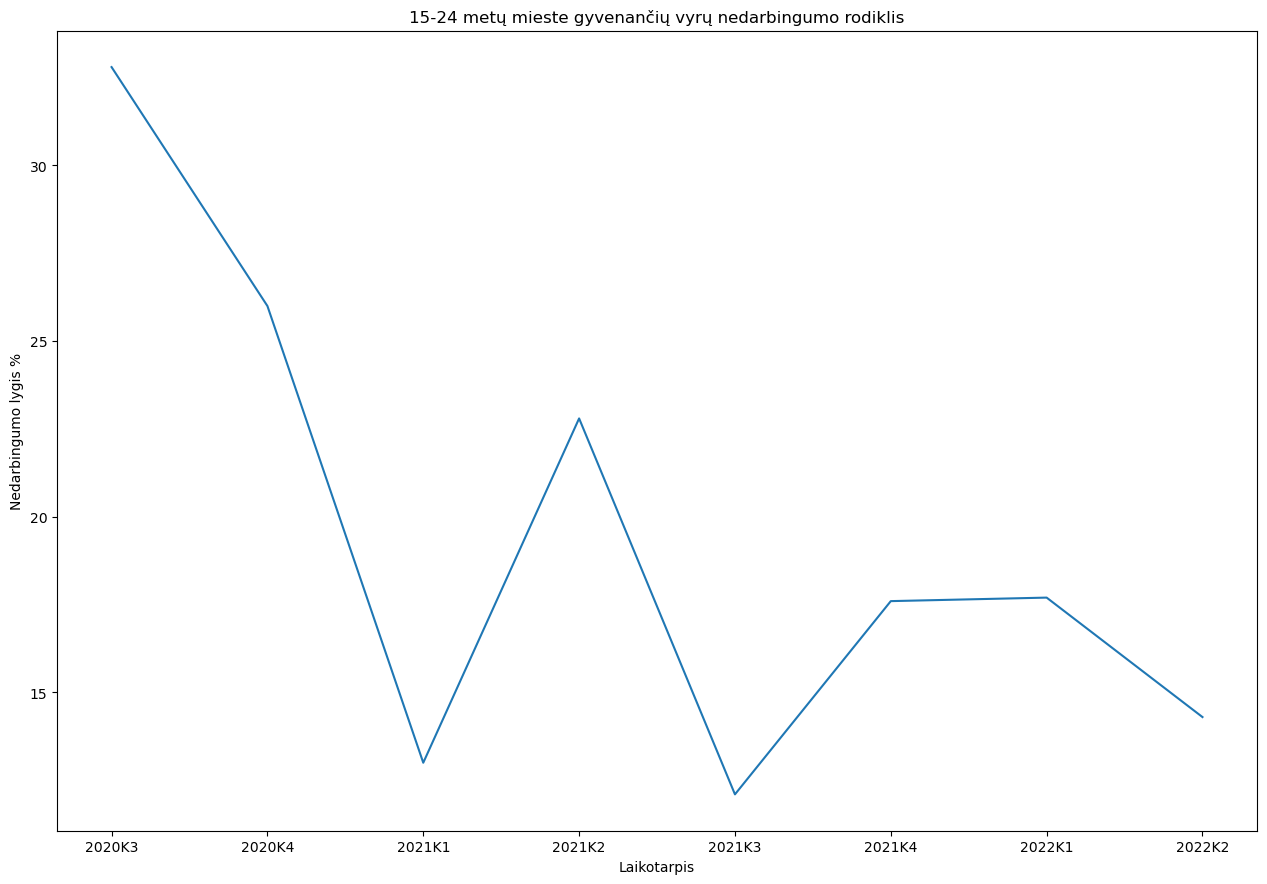

In [186]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.8,0.8])
ax.plot(x,y)

gyvenamoji_vietove = str(input("Norėdami matyti miestus rašykite - 1, kaimus - 2:"))
lytis = str(input("Norėdami matyti vyrus rašykite - 1, moteris - 2:"))
amzius = str(input("Nurodykite amžiau grupę atitinkamai pasirinkdami skaičių: (15–24) - 1,(15–29) - 2,(15–64) - 3,(20–64) - 4,(25–54) - 5,(55–64) - 6:"))


for a in gyvenamoji_vietove:
    if a == "1":
        for b in lytis:
            if b == "1":
                for c in amzius:
                    if c == "1":
                        d = df2[(df2["Amžius"] == "15–24") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("15-24 metų mieste gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "2":
                        d = df2[(df2["Amžius"] == "15–29") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("15-29 metų mieste gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "3":
                        d = df2[(df2["Amžius"] == "15–64") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("15-64 metų mieste gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "4":
                        d = df2[(df2["Amžius"] == "20–64") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("20–64 metų mieste gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "5":
                        d = df2[(df2["Amžius"] == "25–54") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("25–54 metų mieste gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "6":
                        d = df2[(df2["Amžius"] == "55–64") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("55–64 metų mieste gyvenančių vyrų nedarbingumo rodiklis")
                    else:
                        print ("Ar tikrai tinkamai nurodėtę amžiaus grupę?")
            elif a == "2":
                for c in amzius:
                    if c == "1":
                        d = df2[(df2["Amžius"] == "15–24") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("15-24 metų mieste gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "2":
                        d = df2[(df2["Amžius"] == "15–29") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("15-29 metų mieste gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "3":
                        d = df2[(df2["Amžius"] == "15–64") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("15-64 metų mieste gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "4":
                        d = df2[(df2["Amžius"] == "20–64") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("20-64 metų mieste gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "5":
                        d = df2[(df2["Amžius"] == "25–54") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("25-54 metų mieste gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "6":
                        d = df2[(df2["Amžius"] == "55–64") & (df2["Gyvenamoji vietovė"] == "Miestas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("55-64 metų mieste gyvenančių moterų nedarbingumo rodiklis")
                    else:
                        print ("Ar tikrai tinkamai nurodėtę amžiaus grupę?")
            else:
                print ("Ar tikrai pasirinkote teisingą lytį? (Vyrai ar moterys)")
    elif a == "2":
        for b in lytis:
            if b == "1":
                for c in amzius:
                    if c == "1":
                        d = df2[(df2["Amžius"] == "15–24") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("15–24 metų kaime gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "2":
                        d = df2[(df2["Amžius"] == "15–29") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("15–29 metų kaime gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "3":
                        d = df2[(df2["Amžius"] == "15–64") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("15–64 metų kaime gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "4":
                        d = df2[(df2["Amžius"] == "20–64") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("20–64 metų kaime gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "5":
                        d = df2[(df2["Amžius"] == "25–54") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("25–54 metų kaime gyvenančių vyrų nedarbingumo rodiklis")
                    elif c == "6":
                        d = df2[(df2["Amžius"] == "55–64") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Vyrai") ]
                        ax.set_title("55–64 metų kaime gyvenančių vyrų nedarbingumo rodiklis")
                    else:
                        print ("Ar tikrai tinkamai nurodėtę amžiaus grupę?")
            elif a == "2":
                for c in amzius:
                    if c == "1":
                        d = df2[(df2["Amžius"] == "15–24") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("15–24 metų kaime gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "2":
                        d = df2[(df2["Amžius"] == "15–29") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("15–29 metų kaime gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "3":
                        d = df2[(df2["Amžius"] == "15–64") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("15–64 metų kaime gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "4":
                        d = df2[(df2["Amžius"] == "20–64") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("20–64 metų kaime gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "5":
                        d = df2[(df2["Amžius"] == "25–54") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == " Moterys") ]
                        ax.set_title("25–54 metų kaime gyvenančių moterų nedarbingumo rodiklis")
                    elif c == "6":
                        d = df2[(df2["Amžius"] == "55–64") & (df2["Gyvenamoji vietovė"] == "Kaimas") & (df2["Lytis"] == "Moterys") ]
                        ax.set_title("55–64 metų kaime gyvenančių moterų nedarbingumo rodiklis")
                    else:
                        print ("Ar tikrai tinkamai nurodėtę amžiaus grupę?")
            else:
                print ("Ar tikrai pasirinkote teisingą lytį? (Vyrai ar moterys)")
    else:
        print ("Ar tikrai pasirinkote teisingą vietovę? (Miestas ar kaimas)")

x = d["Laikotarpis"]
y = d["Reikšmė %"]
ax.set_xlabel("Laikotarpis")
ax.set_ylabel("Nedarbingumo lygis %")



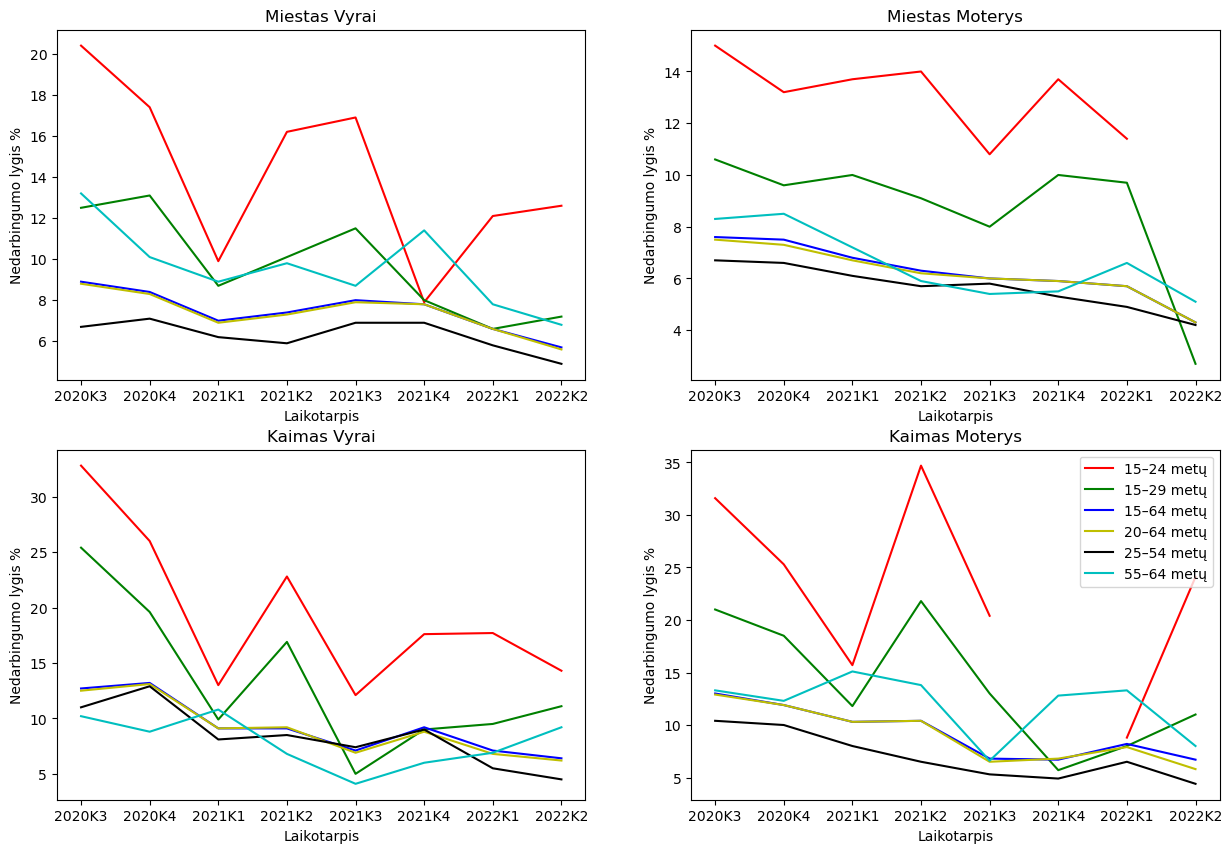

In [182]:
from pandas import unique

grupe = unique(df2["Amžius"])
vietove = ["Miestas","Kaimas"]
Lytis = ["Vyrai","Moterys"]
spalvos = ["r","g","b","y","k","c"]

fig, axes = plt.subplots(2,2)
axesX = 0
axesY = 0

for vieta in vietove:
    axesY = 0
    for lytis in Lytis:
        axes[axesX][axesY].set_title(vieta+" "+lytis)
        axes[axesX][axesY].set_xlabel("Laikotarpis")
        axes[axesX][axesY].set_ylabel("Nedarbingumo lygis %")
        for amzius in range(len(grupe)-1):
            s=df2[(df2["Amžius"] == grupe[amzius]) & (df2["Gyvenamoji vietovė"] == vieta) & (df2["Lytis"] == lytis)]["Reikšmė %"]
            axes[axesX][axesY].plot(x, s, color=spalvos[amzius], label=grupe[amzius]+" metų")
        axesY +=1
    axesX += 1

plt.legend()
plt.show()

Oops! <class 'TypeError'> occurred.


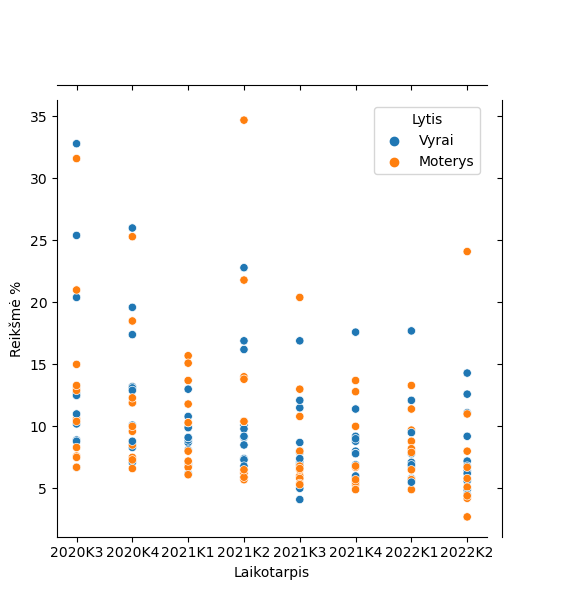

In [183]:
try:
    sns.jointplot(data=df2, x="Laikotarpis", y="Reikšmė %", hue="Lytis")
except Exception as e:
    print("Oops!", e.__class__, "occurred.")